# Data Preprocessing
Prerequisites:
- Python experience, including a basing understanding of python syntax, loops, conditional statements, functions, and data types in python
- Some background in statistics is helpful

Goals for this session:
- Learn to perform basic exploratory data analysis (EDA) and data visualization
- Identify outliers, handle missing values, and perform other common data operations such as normalization and covariate analysis
- Understand the intuition behind various preprocessing techniques for both categorical and continuous features
- Apply EDA and data preprocessing techniques to the Titanic dataset from Kaggle


# Titanic Dataset
In this code-along exercise, we will cover the following data processing techniques:
- Basic DataFrame operations
- Handling missing values
- Removing outliers
- Normalization
- Covariate Analysis
- Engineering new features

[Pandas documentation](https://pandas.pydata.org/docs/reference/frame.html)

# Imports
By convention, we use the `as` in the import statement to alias `numpy` to `np`. Similarly, we alias `pandas` to `pd`. Another convention we will use is calling Pandas DataFrame objects `df`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
The [Titanic dataset](https://www.kaggle.com/competitions/titanic/data) contains information regarding the survival of Titanic passengers.

In this section, we are going to examine the data and handle cases with outliers and missing values.

In [2]:
df = pd.read_csv("data/titanic.csv")

# DataFrame basics

To view the first `n` lines of a DataFrame, we can use `df.head(n)`. By default, `n = 5`. Similarly, to view the last `n` lines, we can use `df.tail(n)`.

In the Jupyter Notebook, the last line of each cell executed prints to the notebook. Simply writing `df` as the last line in a cell will print out an abridged version of the DataFrame.

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Note that the Jupyter Notebook also prints out the number of rows and columns of the DataFrame when we just let it autoprint the DataFrame. We can can so view the shape of the DataFrame using `df.shape`. By convention, the first number in the tuple is the number of rows and the second number is the number of columns.

In [6]:
df.shape

(891, 11)

We can access the index and column axes of the DataFrame with `df.index` and `df.columns` respectively. The values of the DataFrame can be access with `df.values` which returns a numpy array.

In [7]:
df.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.values

array([[0, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [1, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

Other conventions
- Specify one column with `"column name"`, specify multiple columns with `["list", "of", "column", "names"]`
- Index (`axis=0`) contains a unique identifier for each of the rows; Columns (`axis=1`) contain a unique identifier for each of the columns
- Most operations default to applying to the Index axis. It's best practice to specify the axis directly for clairty.

# Viewing subsets
Just selecting data from a dataframe will not apply the operation to the dataframe, unless we assign it to a variable.

To view just a single columns, we can index the dataframe with that column name. Note that a single column will be returned as a `Series` object, which is similar to a dataframe, but with just one column. Therefore, some operations cannot be applied as with dataframes.

In [10]:
# Select the name column
df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

To view multiple columns, pass in a list of column names. When multiple columns are selected, a `DataFrame` is returned.

In [11]:
# View the Name and Sex columns
df[["Name", "Sex"]]

,Name,Sex
PassengerId,,
1,"Braund, Mr. Owen Harris",male
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
3,"Heikkinen, Miss. Laina",female
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
5,"Allen, Mr. William Henry",male
...,...,...
887,"Montvila, Rev. Juozas",male
888,"Graham, Miss. Margaret Edith",female
889,"Johnston, Miss. Catherine Helen ""Carrie""",female


There are two ways to select rows. If you know the row index or indicies, you can use `df.iloc[i]` or `df.iloc[[i, j, k]]` to select those rows.

If you know a condition on the values, you should use `df.loc[index_mask, columns]`. `index_mask` Boolean mask is a `(n,)` sized array of `True` or `False` values, while `columns` is a list of the columns. If `columns` are not specified, it will be assumed that all columns are selected, while rows will be filtered according to `index_mask`.

The mask can be made from taking a Series and applying a Boolean logic operator to it. For example,
`mask = df[col] == value`. Multiple masks can be combined with AND (`&`) and OR (`|`) elementwise operators, with mask expressions in brackets.

In [12]:
# Select rows 1, 3, and 5
df.iloc[[1, 3, 5]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [13]:
# View the name and class of men whose age is greater than 70
mask = (df["Sex"] == "male") & (df["Age"] > 70)
df.loc[mask, ["Name", "Pclass"]]

,Name,Pclass
PassengerId,,
97,"Goldschmidt, Mr. George B",1
117,"Connors, Mr. Patrick",3
494,"Artagaveytia, Mr. Ramon",1
631,"Barkworth, Mr. Algernon Henry Wilson",1
852,"Svensson, Mr. Johan",3


# Visualization

<AxesSubplot: xlabel='Age', ylabel='Density'>

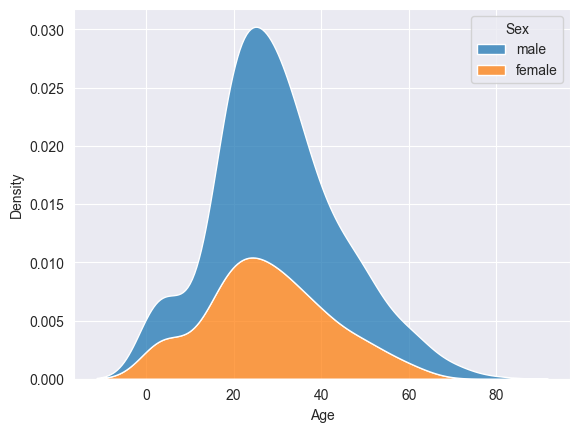

In [16]:
sns.kdeplot(data=df, x='Age', hue='Sex', multiple="stack")

# Outlier removal

Outliers are data points that differ significantly from the mean distribution of the data. Often, outliers can represent incorrect measurements, although domain knowledge is often required to interpret the meaning of outliers. We will only analyze the feature columns (e.g. not `class`) for outliers, since they're all continuous values, whereas `class` is categorical.

In this example, we can view the distributions of each of the features and note that there is an outlier with the aspect ratio with an abnormally large value, where we would typically expect this feature to be between 1-3. There are some compactness and roundness values near 0, where we expect these to be near 1. The solidity feature also has a long left tail, so some lower values might also be considered outliers.

There are many ways to remove outliers, like using heuristic rules. There are also statistical methods. In this example, we'll compute a robust Z-score using $z' = \frac{x - \tilde{x}}{1.4826 \times \text{MAD}(x)}$ where $\tilde{x}$ is the median of $x$, MAD is the median absolute deviation, and 1.4826 is a scale factor so that the MAD approximates the standard deviation of a normal distribution.

We will reject outliers as having a robust Z-score of $|z'| > 6$.

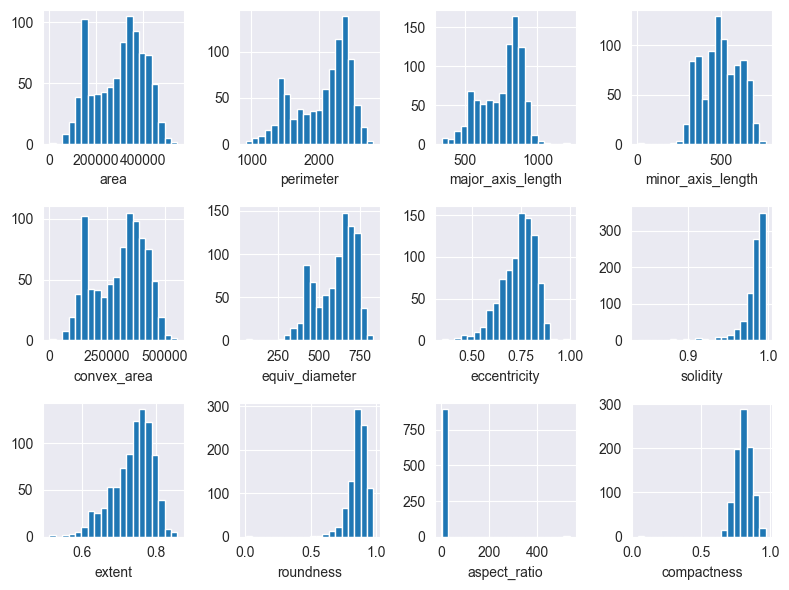

In [22]:
# Plotting the distribution
fig, axs = plt.subplots(3, 4, figsize=(8, 6))

feature_cols = df.columns.drop("class")

for col, ax in zip(feature_cols, axs.flatten()):
    ax.hist(df[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [23]:
# Compute the robust Z-score
from scipy.stats import median_abs_deviation

df_score = df.copy(deep=True)

df_stats = df[feature_cols].agg([np.min, np.max, np.median, median_abs_deviation])
df_stats

,area,perimeter,major_axis_length,minor_axis_length,convex_area,equiv_diameter,eccentricity,solidity,extent,roundness,aspect_ratio,compactness
amin,1987.0,911.82800,336.7227,2.28320,2257.0,50.29840,0.3448,0.8366,0.51230,0.00480,1.06530,0.04110
amax,546063.0,2811.99710,1222.7230,766.45360,552598.0,833.82790,1.0000,0.9974,0.85620,0.97730,535.52570,0.96810
median,319833.0,2196.34545,791.3634,495.05485,327207.0,638.14095,0.7547,0.9873,0.74695,0.86775,1.52415,0.80495
median_abs_deviation,81801.5,250.86500,91.4002,93.74330,81918.5,80.22815,0.0559,0.0054,0.03395,0.03450,0.15075,0.03995


In [24]:
for col in feature_cols:
    median = df_stats.loc["median", col]
    mad = df_stats.loc["median_abs_deviation", col]
    func = lambda x: (x - median) / (1.4826 * mad)
    df_score[col] = df_score[col].apply(func)

In [25]:
df_score

,area,perimeter,major_axis_length,minor_axis_length,convex_area,equiv_diameter,eccentricity,solidity,extent,roundness,aspect_ratio,compactness,class
0,0.843758,0.490849,0.343038,1.083683,0.800487,0.798789,-1.416551,0.924302,0.718199,1.361689,-1.013638,1.182680,BERHI
1,0.150917,-0.298983,-0.498440,0.720605,0.097215,0.151375,-2.240661,1.261548,0.646677,2.141753,-1.378288,1.714507,BERHI
2,1.706892,1.212716,1.102314,1.585141,1.660478,1.520697,-1.270552,1.111661,0.372510,1.502453,-0.935786,1.108393,BERHI
3,0.793460,0.416378,0.270216,1.081018,0.749660,0.754096,-1.545658,0.936793,0.575155,1.525913,-1.078514,1.251902,BERHI
4,0.228638,-0.096769,-0.202020,0.631592,0.194233,0.227734,-1.305544,0.437170,0.197678,1.330409,-0.954578,1.110082,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.531255,-0.728574,-0.734397,-0.128614,-0.544897,-0.570740,-0.369220,-1.099170,-0.398337,-0.038123,-0.332212,0.326693,SOGAY
894,0.380041,1.259577,0.473027,0.406449,0.488743,0.373566,0.117040,-5.083662,-1.538713,-4.305988,0.120133,-0.119028,SOGAY
895,-0.540102,-0.724888,-0.323733,-0.427625,-0.584196,-0.580821,0.698623,0.649510,-0.455952,-0.133921,0.857934,-0.736959,SOGAY
896,-0.666876,-0.779920,-0.551361,-0.382959,-0.645619,-0.727682,0.393352,-3.359963,-1.024153,-0.810366,0.437804,-0.595139,SOGAY


In [26]:
# mask is a (n, d) array of (0, 1) values
mask = (df_score[feature_cols] > 6) | (df_score[feature_cols] < -6)
mask.sum(axis="rows")

area                  0
perimeter             0
major_axis_length     0
minor_axis_length     0
convex_area           0
equiv_diameter        0
eccentricity          0
solidity             28
extent                0
roundness             2
aspect_ratio          1
compactness           1
dtype: int64

In [27]:
# Summing mask along columns reveals which rows are outliers
df.loc[mask.sum(axis="columns") != 0].sort_values(by="area")

,area,perimeter,major_axis_length,minor_axis_length,convex_area,equiv_diameter,eccentricity,solidity,extent,roundness,aspect_ratio,compactness,class
615,1987,2289.3059,1222.7230,2.2832,2257,50.2984,1.0000,0.8804,0.8528,0.0048,535.5257,0.0411,SAFAVI
205,65590,1039.9240,372.3486,279.8673,78398,288.9840,0.6596,0.8366,0.6711,0.7622,1.3304,0.7761,DOKOL
262,134094,1444.8110,541.8755,358.6036,145397,413.1994,0.7497,0.9223,0.7292,0.8072,1.5111,0.7625,DOKOL
332,156030,1566.9790,595.6793,384.2388,171132,445.7169,0.7641,0.9118,0.6319,0.7985,1.5503,0.7482,DOKOL
148,161602,1700.8960,671.8093,404.6781,192973,453.6056,0.7982,0.8374,0.6520,0.7019,1.6601,0.6752,DEGLET
199,168314,1634.1880,611.6520,396.3839,187089,462.9298,0.7616,0.8996,0.7235,0.7920,1.5431,0.7569,DOKOL
116,190722,1769.6710,664.2511,418.4305,213622,492.7827,0.7767,0.8928,0.6364,0.7653,1.5875,0.7419,DEGLET
89,192966,1718.1270,656.2819,433.3523,212294,495.6732,0.7510,0.9090,0.7112,0.8214,1.5144,0.7553,DEGLET
99,210311,1798.9200,671.3657,443.1094,228850,517.4711,0.7513,0.9190,0.6955,0.8167,1.5151,0.7708,DEGLET
128,212851,1826.4060,675.8557,453.7003,236831,520.5865,0.7412,0.8987,0.6544,0.8018,1.4897,0.7703,DEGLET


# Feature normalization

As discussed earlier, machine learning models require their inputs to be in vectors. Additionally, a lot of ML models assume that the input data is roughly normally distributed with 0 mean and unit standard deviation, or that the data is scaled between [-1, 1]. By preparing data to have a standard normal distribution generally improves model performance compared to having un-normalized features.

Scikit-learn has a handy interface to apply common normalization techniques like standard scaling and min-max scaling to dataframes.

We only apply this normalization to the feature columns, e.g. not the `class` column. Later, we will talk about how to encode categorical variables like `class` for ML models.

In [28]:
feature_cols = df.columns.drop("class")
X_df = df[feature_cols]

In [29]:
scaler = StandardScaler().set_output(transform="pandas")
X_df_trans = scaler.fit_transform(X_df)

We can see that the mean and standard deviation of the features are now 0 and 1 respectively.

In [30]:
X_df_trans.agg(["mean", "std"]).round(3)

,area,perimeter,major_axis_length,minor_axis_length,convex_area,equiv_diameter,eccentricity,solidity,extent,roundness,aspect_ratio,compactness
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001


# Missing Data
On a small dataset like there, here's an easy way to visualize how much data is missing. Clearly, many passengers are missing a Cabin, and some are missing an age. Oddly, at least one passenger has no information on where they embarked from.

<AxesSubplot: ylabel='PassengerId'>

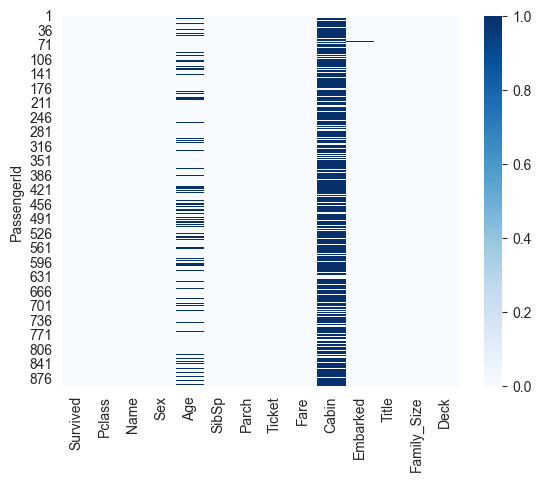

In [70]:
sns.heatmap(df.isna(), cmap='Blues')

In [71]:
df[df.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Deck
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,B
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,B


What to do with missing values is a design decision.

One option would be to drop the entire Embarked column. It might appear as if the port where passengers embark impacts their likelihood of survival, but higher class passengers were also more likely to board at certain ports. This feature might not actually be useful in classifying survival.

On the other hand, you could simply drop the two rows with missing values, or try to impute those values using the most likely port that they boarded at.

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

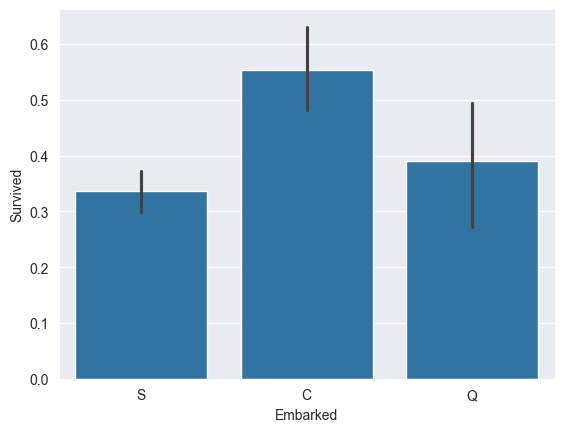

In [75]:
sns.barplot(x=df.Embarked, y=df.Survived)

<AxesSubplot: xlabel='Embarked', ylabel='Pclass'>

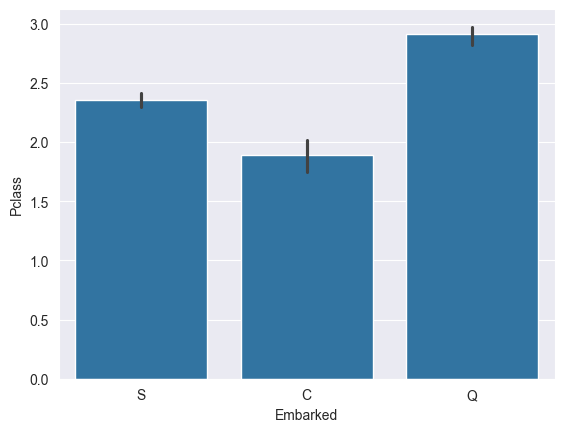

In [74]:
sns.barplot(x=df.Embarked, y=df.Pclass)

# Feature Engineering

1. The 'Name' category doesn't tell us much on its own, but the titles can be useful as identifiers. We will extract the titles from the names, and map these to categories, creating a new feature.

In [29]:
df['Title'] = df['Name'].apply(lambda name:name.split(',')[1].split('.')[0].strip())

In [30]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [33]:
title_mapping = {
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Don': 'Noble',
    'Sir': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Jonkheer': 'Noble'
}

In [34]:
df['Title'] = df['Title'].map(title_mapping).fillna(df['Title']) # any title not in the mapping is left unchanged

In [37]:
df.drop('Name', axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Officer,1
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,1
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4


2. The 'SibSp' feature tells us about how many siblings or spouses a passenger has onboard. The 'Parch' feature tells us about the number of parents and children a passenger has onboard. Together, we can create a 'Family Size' feature that represents known relatives. Note that in a linear regression model, linear combinations of features are redundant, but still shown here as an example.

In [27]:
df['Family_Size']=df['SibSp']+df['Parch']+1

3. Only first class has Cabin numbers, but they are listed in formats like "G6" or "D10". Let's convert these to a 'Deck' category.

In [51]:
# utility function to help us parse the cabin numbers
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [58]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck'] = df['Cabin'].map(lambda x: substrings_in_string(str(x), cabin_list)).fillna('No Cabin')

People who had cabins were more likely to survive than those who didn't. Nobody on deck 'T' survived.

<AxesSubplot: xlabel='Deck', ylabel='Survived'>

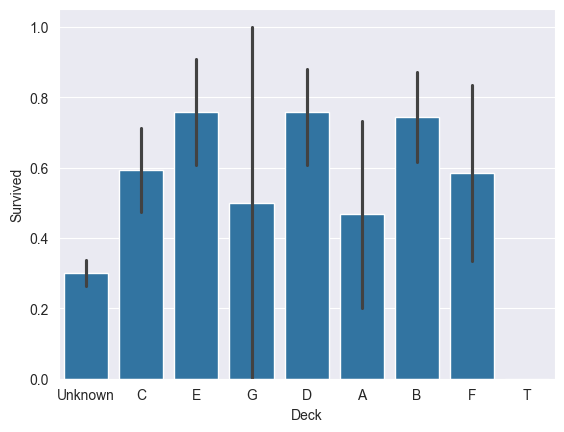

In [56]:
sns.barplot(x=df.Deck, y=df.Survived)

<AxesSubplot: xlabel='Deck', ylabel='Fare'>

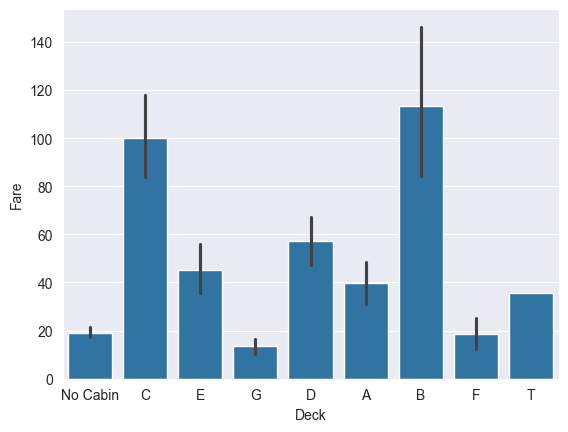

In [82]:
sns.barplot(x=df.Deck, y=df.Fare)

## Ordinal Categoricals

The Titanic Dataset contains plenty of categorical data. Many machine learning models require vector inputs with numerical data. So, a very common operation is to encode categorical variables, effectively converting them into integer format.

Ordinal categoricals are discrete categories that have some order. Think "small", "medium", "large". One technique for converting nominal categorical variables to numeric values is label encoding.

An example is the passenger class feature.

In [90]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Nominal Categoricals

Nominal categoricals have no order, so concepts such as mean, min, and max have no interpretation. One particularly popular method of encoding, known as One-Hot Encoding involves representing categorical variables as binary columns.

In [89]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex'])

KeyError: "None of [Index(['Embarked', 'Sex'], dtype='object')] are in the [columns]"

In [88]:
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Family_Size,Deck,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr,2,No Cabin,False,True,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs,2,C,False,False,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,1,No Cabin,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,2,C,False,True,False
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr,1,No Cabin,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,Officer,1,No Cabin,False,True,True
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,Miss,1,B,False,True,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,Miss,4,No Cabin,False,True,False


## Converting to Categorical

Suppose you are interested in comparing candy ratings across age groups. Looking at ratings for each individual age does not make practical sense, so you could bin the age column into categories.

In [113]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [119]:
df['Age'].apply(lambda x: round(x, -1))

PassengerId
1      20.0
2      40.0
3      30.0
4      40.0
5      40.0
       ... 
887    30.0
888    20.0
889     NaN
890    30.0
891    30.0
Name: Age, Length: 891, dtype: float64

# Handling Missing Values

Not all missing values are equal. Consider arbitrary survey data taken from the general population.

**Missing Not At Random** - when a value is missing for a reason related to the true value. (Ex: if a survey responding chooses not to disclose their income, this could be because they have an abnormally high or low income)

**Missing at Random** - when a value is missing for a reason related to another observed variable. (Ex: many age values are missing for survey respondents of a particular gender)

**Missing Completely at Random** - when there's no patterns in the missing values.

## Deletion

- Column deletion: removing a column that has too many missing values and is non-essential for your model
- Row deletion: removing rows with missing values, ideally if the missing values are Missing At Random, to avoid biasing your model

In [95]:
df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Family_Size,Deck,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,Mr,2,No Cabin,False,True,True
2,1,1,38.0,1,0,71.2833,Mrs,2,C,False,False,False
3,1,3,26.0,0,0,7.9250,Miss,1,No Cabin,False,True,False
4,1,1,35.0,1,0,53.1000,Mrs,2,C,False,True,False
5,0,3,35.0,0,0,8.0500,Mr,1,No Cabin,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,Officer,1,No Cabin,False,True,True
888,1,1,19.0,0,0,30.0000,Miss,1,B,False,True,False
889,0,3,NaN,1,2,23.4500,Miss,4,No Cabin,False,True,False


In [96]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Family_Size,Deck,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr,2,No Cabin,False,True,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs,2,C,False,False,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,1,No Cabin,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,2,C,False,True,False
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr,1,No Cabin,False,True,True


Two ways of making deletion persistent in a DataFrame.

In [6]:
# df.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
# df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

## Imputation

- Fill missing values with their defaults (empty string, zero, etc...)
- Fill missing values with the mean, median, or mode
- Backward or forward fill
- Imputation risks injecting your own bias and adding noise to the data, and should be performed with caution

In [102]:
df['Age'].fillna(30)

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    30.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [115]:
df['Age'].median(), df['Age'].mean()

(28.0, 29.69911764705882)

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)